In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [41]:
df = pd.read_excel(r'D:\\Westiminster\\Final project\\FB_SCAM\\Raw_complete.xlsx')
mad_columns = ["Key_mad", "Senti_mad", "Length_mad", "Mad_Price", "Spl_Char_Avg_MAD", "Mad_Grammar"]
mad_df = df[mad_columns].copy()

c:\Users\Jarviz_92\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


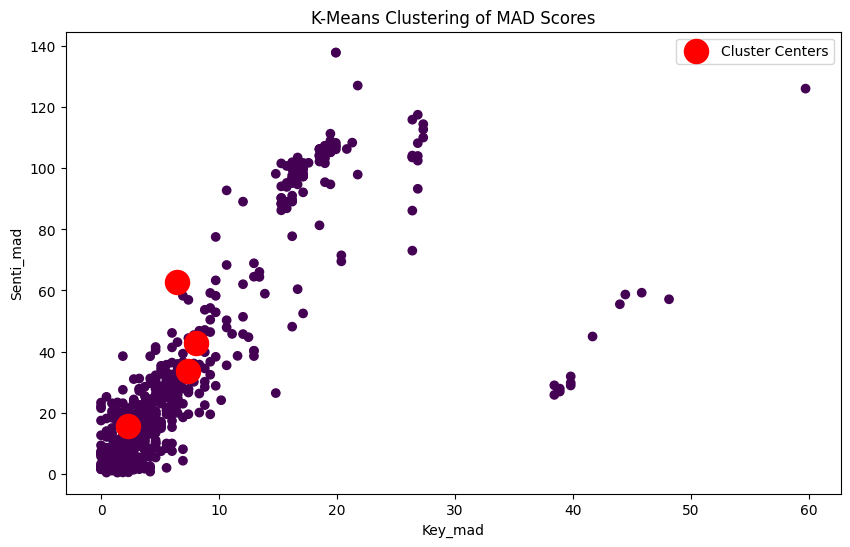

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have MAD scores in your DataFrame mad_df
X = mad_df[['Key_mad', 'Senti_mad', 'Length_mad', 'Mad_Price', 'Spl_Char_Avg_MAD', 'Mad_Grammar']]

# Choose the number of clusters (you can adjust this)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
mad_df['Cluster_Label'] = kmeans.fit_predict(X)

# Function to label clusters based on MAD score characteristics
def label_clusters(row):
    if row == 0:
        return 'low risk'
    elif row == 1:
        return 'medium risk'
    else:
        return 'high risk'

# Apply the label_clusters function to create a new column 'Risk_Level'
mad_df['Risk_Level'] = mad_df['Cluster_Label'].apply(label_clusters)

# Visualize the clusters
cluster_centers = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))
plt.scatter(X['Key_mad'], X['Senti_mad'], c=mad_df['Cluster_Label'], cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', label='Cluster Centers')
plt.title('K-Means Clustering of MAD Scores')
plt.xlabel('Key_mad')
plt.ylabel('Senti_mad')
plt.legend()
plt.show()


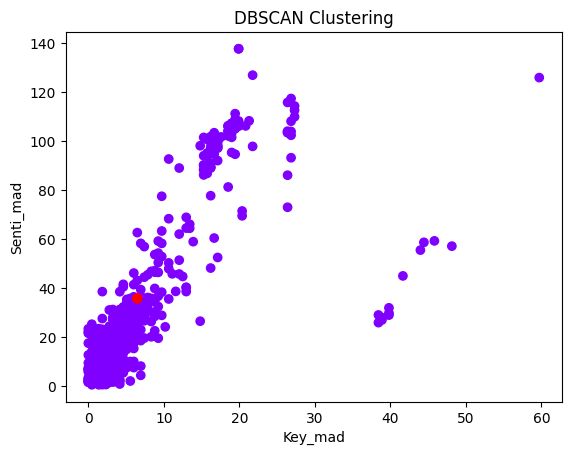

In [43]:
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have MAD scores in your DataFrame mad_df
X = mad_df[['Key_mad', 'Senti_mad', 'Length_mad', 'Mad_Price', 'Spl_Char_Avg_MAD', 'Mad_Grammar']]

# Create a DBSCAN instance
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust 'eps' and 'min_samples' as needed

# Fit the DBSCAN model to your data
dbscan.fit(X)

# Get the cluster labels for each data point (-1 represents outliers)
cluster_labels = dbscan.labels_

# Add the cluster labels to your DataFrame
mad_df['Cluster_Label'] = cluster_labels

# Visualize the clusters (for example, with a scatter plot)
plt.scatter(X['Key_mad'], X['Senti_mad'], c=cluster_labels, cmap='rainbow')
plt.xlabel('Key_mad')
plt.ylabel('Senti_mad')
plt.title('DBSCAN Clustering')
plt.show()


In [44]:
df = pd.read_excel("Raw_complete.xlsx")

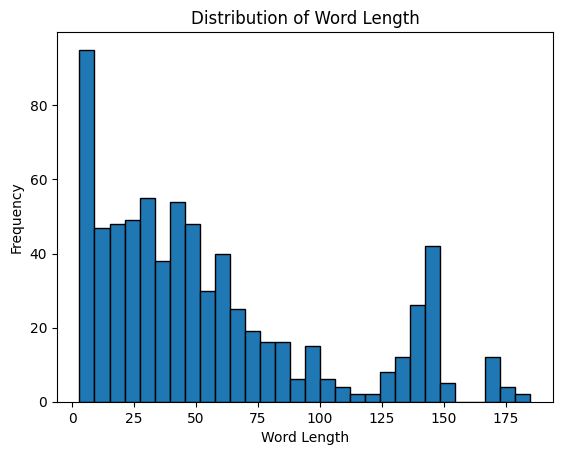

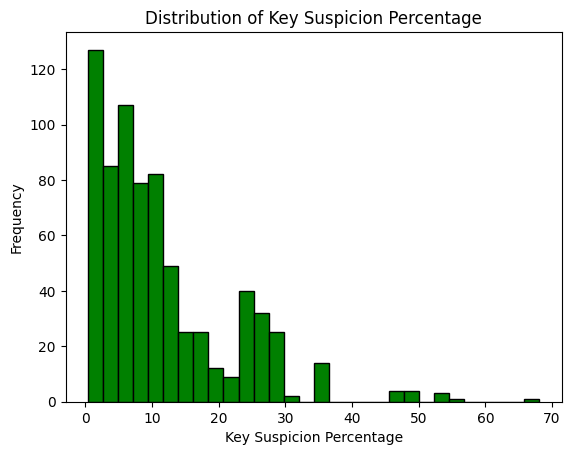

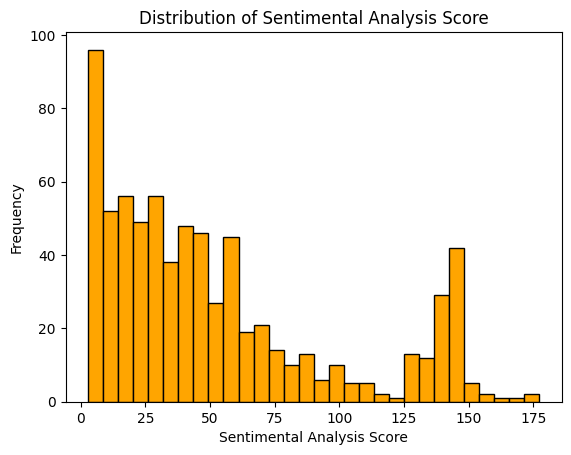

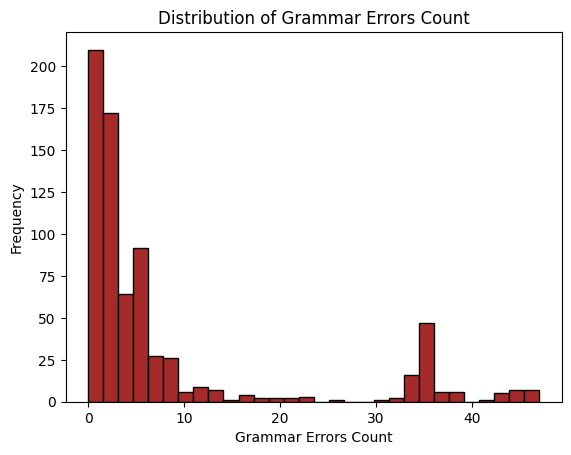

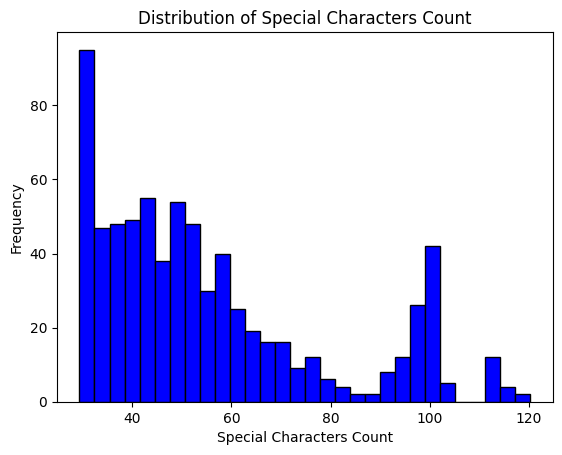

In [45]:
import matplotlib.pyplot as plt

# Plot a histogram of Word Length
plt.hist(df['Word_Length'], bins=30, edgecolor='k')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Word Length')
plt.show()

# Plot a histogram of Key Suspicion Percentage
plt.hist(df['key_suspicious_per'], bins=30, edgecolor='k', color='green')
plt.xlabel('Key Suspicion Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Key Suspicion Percentage')
plt.show()

# Plot a histogram of Sentimental Analysis Score
plt.hist(df['Sentimental_analysis_score'], bins=30, edgecolor='k', color='orange')
plt.xlabel('Sentimental Analysis Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentimental Analysis Score')
plt.show()

# Plot a histogram of Grammar Errors Count
plt.hist(df['grammar_errors_count'], bins=30, edgecolor='k', color='brown')
plt.xlabel('Grammar Errors Count')
plt.ylabel('Frequency')
plt.title('Distribution of Grammar Errors Count')
plt.show()

plt.hist(df['Spl_Char_Avg'], bins=30, edgecolor='k', color='blue')
plt.xlabel('Special Characters Count')
plt.ylabel('Frequency')
plt.title('Distribution of Special Characters Count')
plt.show()

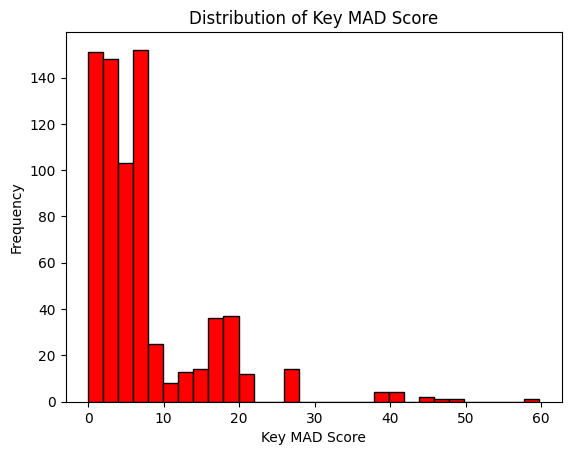

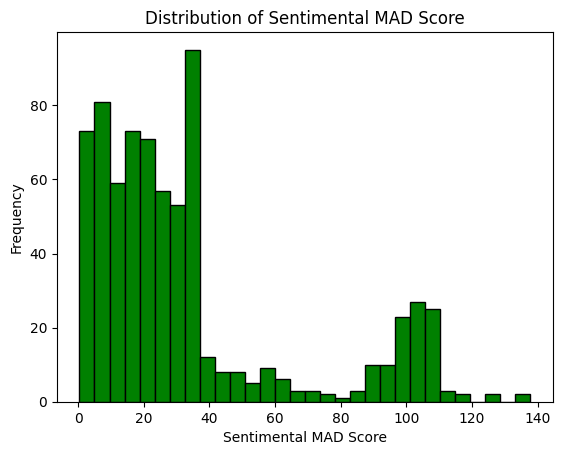

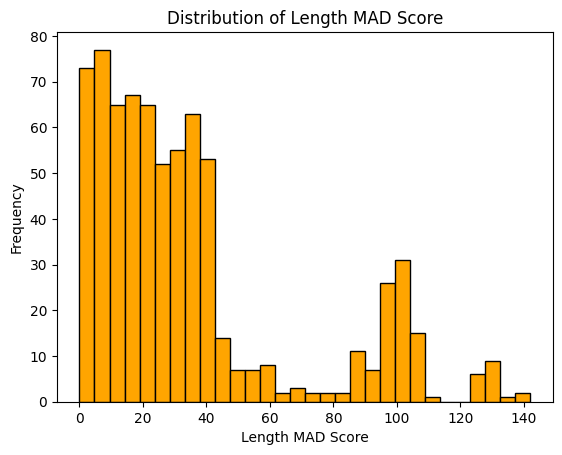

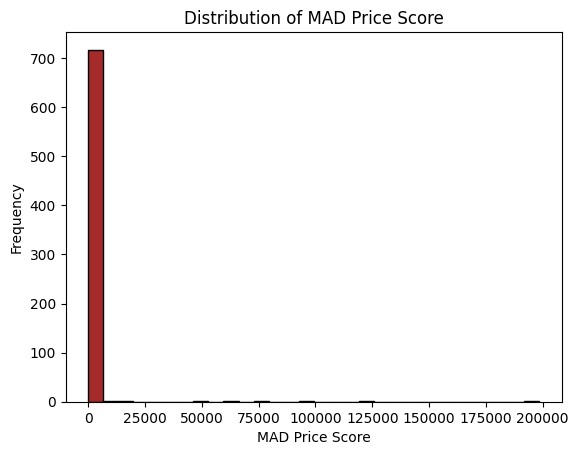

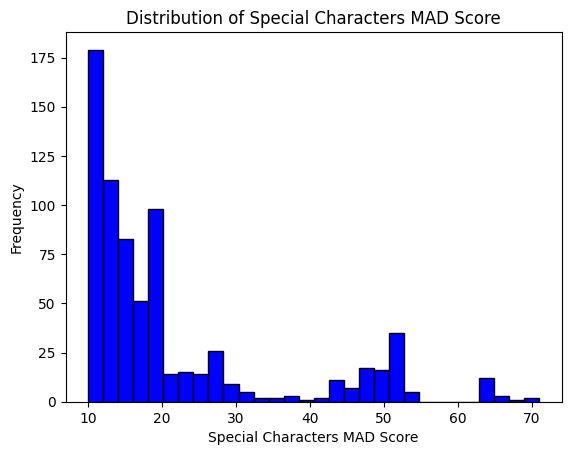

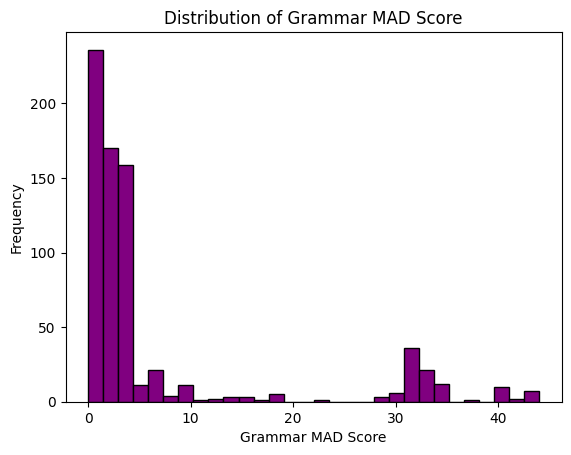

In [46]:
import matplotlib.pyplot as plt

# Plot a histogram of Key MAD Score
plt.hist(mad_df['Key_mad'], bins=30, edgecolor='k', color='red')
plt.xlabel('Key MAD Score')
plt.ylabel('Frequency')
plt.title('Distribution of Key MAD Score')
plt.show()

# Plot a histogram of Sentimental MAD Score
plt.hist(mad_df['Senti_mad'], bins=30, edgecolor='k', color='green')
plt.xlabel('Sentimental MAD Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentimental MAD Score')
plt.show()

# Plot a histogram of Length MAD Score
plt.hist(mad_df['Length_mad'], bins=30, edgecolor='k', color='orange')
plt.xlabel('Length MAD Score')
plt.ylabel('Frequency')
plt.title('Distribution of Length MAD Score')
plt.show()

# Plot a histogram of MAD Price Score
plt.hist(mad_df['Mad_Price'], bins=30, edgecolor='k', color='brown')
plt.xlabel('MAD Price Score')
plt.ylabel('Frequency')
plt.title('Distribution of MAD Price Score')
plt.show()

# Plot a histogram of Special Characters MAD Score
plt.hist(mad_df['Spl_Char_Avg_MAD'], bins=30, edgecolor='k', color='blue')
plt.xlabel('Special Characters MAD Score')
plt.ylabel('Frequency')
plt.title('Distribution of Special Characters MAD Score')
plt.show()

# Plot a histogram of Grammar MAD Score
plt.hist(mad_df['Mad_Grammar'], bins=30, edgecolor='k', color='purple')
plt.xlabel('Grammar MAD Score')
plt.ylabel('Frequency')
plt.title('Distribution of Grammar MAD Score')
plt.show()


KeyError: 'Length'

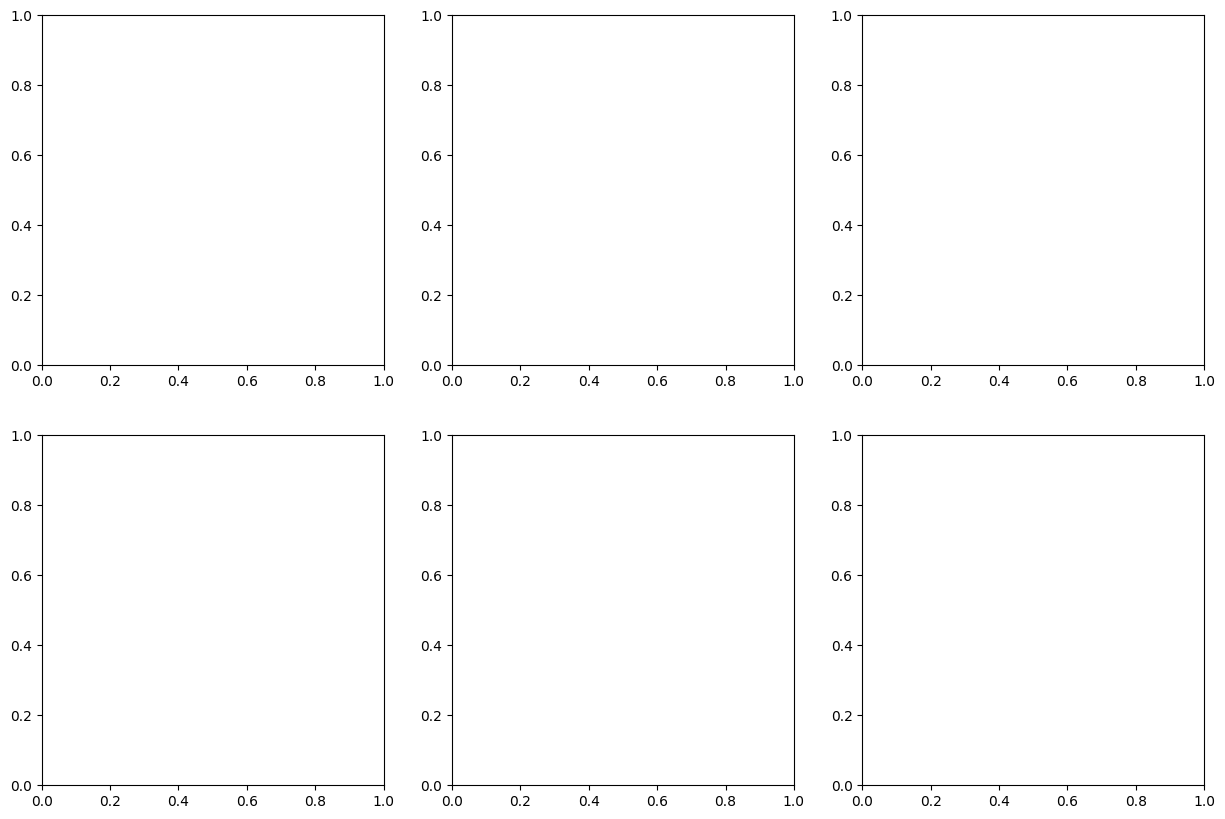

In [50]:
import matplotlib.pyplot as plt

# Set your threshold values
word_length_threshold = (25, 125)
key_suspicious_threshold = 20
sentimental_score_threshold = (25, 100)
special_char_threshold = (0)
grammar_errors_threshold = 10

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot histograms for each feature
axs[0, 0].hist(df['Length'], bins=30, edgecolor='k', color='blue')
axs[0, 0].set_title('Word Length')
axs[0, 0].axvline(x=word_length_threshold[0], color='red', linestyle='--', label='Threshold (Min)')
axs[0, 0].axvline(x=word_length_threshold[1], color='green', linestyle='--', label='Threshold (Max)')

axs[0, 1].hist(df['key_suspicious_per'], bins=30, edgecolor='k', color='green')
axs[0, 1].set_title('Key Suspicion Percentage')
axs[0, 1].axvline(x=key_suspicious_threshold, color='red', linestyle='--', label='Threshold')

axs[0, 2].hist(df['Sentimental_analysis_score'], bins=30, edgecolor='k', color='orange')
axs[0, 2].set_title('Sentimental Analysis Score')
axs[0, 2].axvline(x=sentimental_score_threshold[0], color='red', linestyle='--', label='Threshold (Min)')
axs[0, 2].axvline(x=sentimental_score_threshold[1], color='green', linestyle='--', label='Threshold (Max)')

axs[1, 0].hist(df['Spl_Char_Avg'], bins=30, edgecolor='k', color='purple')
axs[1, 0].set_title('Special Characters')
axs[1, 0].axvline(x=special_char_threshold[0], color='red', linestyle='--', label='Threshold (Min)')
axs[1, 0].axvline(x=special_char_threshold[1], color='green', linestyle='--', label='Threshold (Max)')

axs[1, 1].hist(df['grammar_errors_count'], bins=30, edgecolor='k', color='brown')
axs[1, 1].set_title('Grammar Errors Count')
axs[1, 1].axvline(x=grammar_errors_threshold, color='red', linestyle='--', label='Threshold')

# Add split lines
for ax in axs.flat:
    ax.axhline(y=0, color='black', linewidth=1.0)
    ax.axvline(x=0, color='black', linewidth=1.0)

# Add legend
for ax in axs.flat:
    ax.legend()

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()


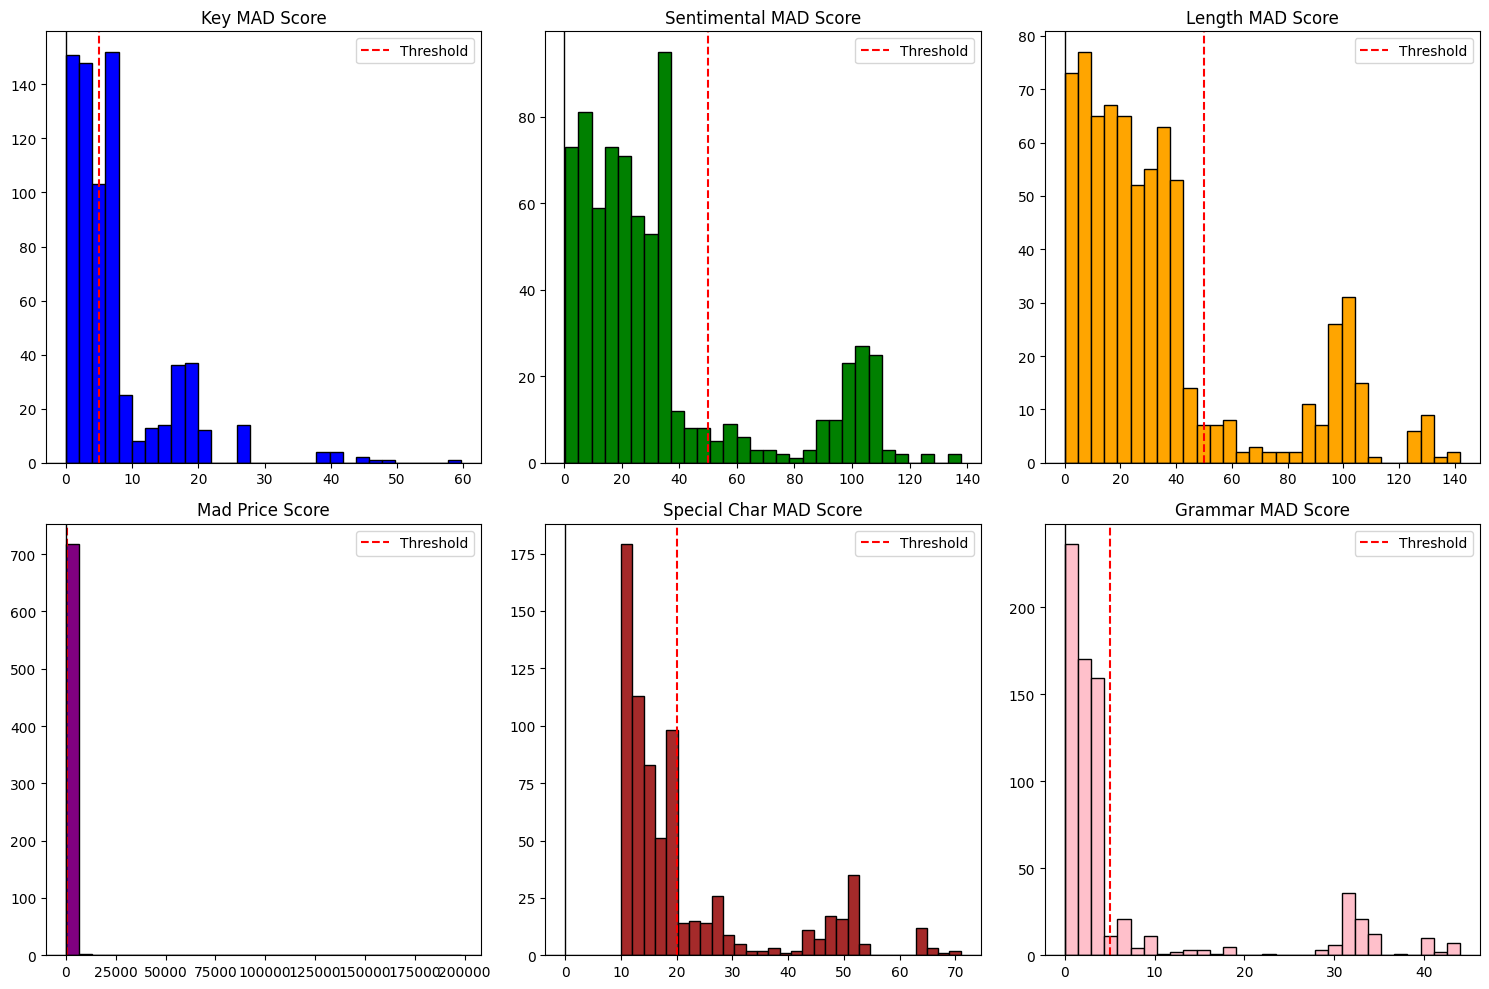

In [56]:
import matplotlib.pyplot as plt

# Set your threshold values for MAD scores
key_mad_threshold = 5
senti_mad_threshold = 50  # Chose a specific value within the range (25, 75)
length_mad_threshold = 50  # Chose a specific value within the range (25, 75)
mad_price_threshold = 500
spl_char_mad_threshold = 20
mad_grammar_threshold = 5

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot histograms for each MAD score
axs[0, 0].hist(df['Key_mad'], bins=30, edgecolor='k', color='blue')
axs[0, 0].set_title('Key MAD Score')
axs[0, 0].axvline(x=key_mad_threshold, color='red', linestyle='--', label='Threshold')

axs[0, 1].hist(df['Senti_mad'], bins=30, edgecolor='k', color='green')
axs[0, 1].set_title('Sentimental MAD Score')
axs[0, 1].axvline(x=senti_mad_threshold, color='red', linestyle='--', label='Threshold')

axs[0, 2].hist(df['Length_mad'], bins=30, edgecolor='k', color='orange')
axs[0, 2].set_title('Length MAD Score')
axs[0, 2].axvline(x=length_mad_threshold, color='red', linestyle='--', label='Threshold')

axs[1, 0].hist(df['Mad_Price'], bins=30, edgecolor='k', color='purple')
axs[1, 0].set_title('Mad Price Score')
axs[1, 0].axvline(x=mad_price_threshold, color='red', linestyle='--', label='Threshold')

axs[1, 1].hist(df['Spl_Char_Avg_MAD'], bins=30, edgecolor='k', color='brown')
axs[1, 1].set_title('Special Char MAD Score')
axs[1, 1].axvline(x=spl_char_mad_threshold, color='red', linestyle='--', label='Threshold')

axs[1, 2].hist(df['Mad_Grammar'], bins=30, edgecolor='k', color='pink')
axs[1, 2].set_title('Grammar MAD Score')
axs[1, 2].axvline(x=mad_grammar_threshold, color='red', linestyle='--', label='Threshold')

# Add split lines
for ax in axs.flat:
    ax.axhline(y=0, color='black', linewidth=1.0)
    ax.axvline(x=0, color='black', linewidth=1.0)

# Add legend
for ax in axs.flat:
    ax.legend()

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()


In [59]:
# Define the thresholds for each feature
thresholds = {
    'Key_mad': (0, 15),
    'Senti_mad': (25, 100),
    'Length_mad': (25, 75),
    'Mad_Price': (0, 500),
    'Spl_Char_Avg_MAD': (0, 30),
    'Mad_Grammar': (0, 10)
}

# Create a scoring system for each feature (higher score for exceeding the threshold)
scores = {
    'Key_mad': [0, 1, 2],  # Low, Medium, High
    'Senti_mad': [2, 1, 0],  # Low, Medium, High
    'Length_mad': [2, 1, 0],  # Low, Medium, High
    'Mad_Price': [0, 1, 2],  # Low, Medium, High
    'Spl_Char_Avg_MAD': [0, 1, 2],  # Low, Medium, High
    'Mad_Grammar': [0, 1, 2]  # Low, Medium, High
}

# Create a function to calculate the total score and reason for each row
def calculate_scam_score_and_reason(row):
    total_score = 0
    reasons = []

    for feature, (low_threshold, high_threshold) in thresholds.items():
        value = row[feature]
        if low_threshold <= value <= high_threshold:
            total_score += scores[feature][0]  # Low score
            reasons.append(f"{feature} is within the threshold.")
        elif value > high_threshold:
            total_score += scores[feature][2]  # High score
            reasons.append(f"{feature} exceeds the threshold (High).")
        else:
            total_score += scores[feature][1]  # Medium score
            reasons.append(f"{feature} exceeds the lower threshold (Medium).")

    return total_score, reasons

# Create new columns to store the scam scores and reasons
df['Scam_Score'], df['Scam_Reasons'] = zip(*df.apply(calculate_scam_score_and_reason, axis=1))

# Create a new column to store the scam alert levels
df['Scam_Alert_Level'] = df.apply(lambda row: 'Low' if row['Scam_Score'] <= 3 else ('Medium' if row['Scam_Score'] <= 6 else 'High'), axis=1)

# Display the modified DataFrame with scores, reasons, and alert levels
print(df[['Key_mad', 'Senti_mad', 'Length_mad', 'Mad_Price', 'Spl_Char_Avg_MAD', 'Mad_Grammar', 'Scam_Score', 'Scam_Reasons', 'Scam_Alert_Level']])

df.to_excel("Checkpoint.xlsx")


      Key_mad  Senti_mad  Length_mad  Mad_Price  Spl_Char_Avg_MAD  \
0    6.481481  62.636266          61  198411.30              31.5   
1    3.703704  20.231807          20  124355.00              10.0   
2    0.925926  11.352323           8   98646.58              14.5   
3    3.703704  16.883913          13   73411.30              11.5   
4    3.703704  13.427370          13   63975.74              11.5   
..        ...        ...         ...        ...               ...   
721  7.870370  32.540559          36       0.00              18.0   
722  6.481481  35.744332          39       0.00              19.5   
723  3.240741  27.859203          20       0.00              10.0   
724  6.481481  35.744332          39       0.00              19.5   
725  6.018519  28.778150          32       0.00              16.0   

     Mad_Grammar  Scam_Score  \
0              4           8   
1              1           4   
2              1           4   
3              2           4   
4          

In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Encode the target variable if it's not already encoded
label_encoder = LabelEncoder()
df['Scam_Alert_Level'] = label_encoder.fit_transform(df['Scam_Alert_Level'])

# Define features and target variable
X = df[['Length_mad', 'Key_mad', 'Senti_mad','Mad_Price','Spl_Char_Avg_MAD', 'grammar_errors_count']]
y = df['Scam_Alert_Level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple feedforward neural network
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Not_scam','Legitimate', 'Scam'])

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Epoch 1/20
15/15 [==============================] - 1s 13ms/step - loss: -24.9528 - accuracy: 0.1164 - val_loss: -252.8668 - val_accuracy: 0.0948
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: -50.5786 - accuracy: 0.1164 - val_loss: -324.4713 - val_accuracy: 0.0948
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: -72.4415 - accuracy: 0.1164 - val_loss: -378.7874 - val_accuracy: 0.0948
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: -89.6406 - accuracy: 0.1164 - val_loss: -453.7746 - val_accuracy: 0.0948
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: -103.0900 - accuracy: 0.1164 - val_loss: -543.9009 - val_accuracy: 0.0948
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: -113.0022 - accuracy: 0.1164 - val_loss: -679.8303 - val_accuracy: 0.0948
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: -148.2178 - accuracy: 0.1164 - val_loss: -772.8434 - va

c:\Users\Jarviz_92\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jarviz_92\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jarviz_92\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [66]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define your features (X) and target (y)
X = df[['Length_mad', 'Key_mad', 'Senti_mad', 'Mad_Price', 'Spl_Char_Avg_MAD', 'Mad_Grammar']]
y = df['Scam_Alert_Level']  # The target variable you want to predict

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier (you can choose other classifiers)
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9657534246575342
Classification Report:
              precision    recall  f1-score   support

        High       0.96      0.90      0.93        29
         Low       0.94      1.00      0.97        15
      Medium       0.97      0.98      0.98       102

    accuracy                           0.97       146
   macro avg       0.96      0.96      0.96       146
weighted avg       0.97      0.97      0.97       146



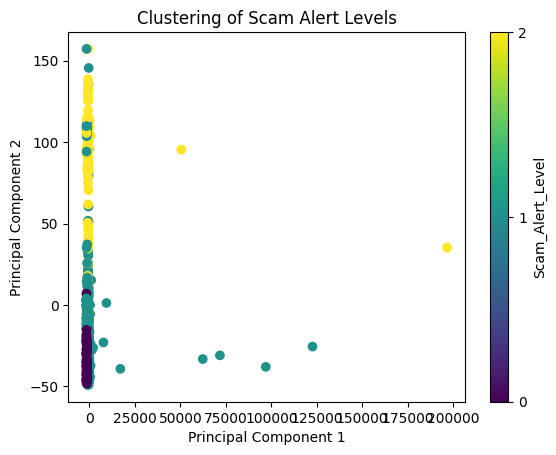

In [74]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have a DataFrame df with your data
# Extract the features you want to visualize (e.g., Length_mad, Key_mad, Senti_mad, etc.)
features = df[['Length_mad', 'Key_mad', 'Senti_mad', 'Mad_Price', 'Spl_Char_Avg_MAD', 'Mad_Grammar']]

# Perform PCA to reduce dimensionality
# Here, we'll use PCA as an example
pca = PCA(n_components=2)  # You can change n_components to 3 for a 3D plot
reduced_features = pca.fit_transform(features)

# Map Scam_Alert_Level to numerical values
scam_alert_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Scam_Alert_Num'] = df['Scam_Alert_Level'].map(scam_alert_mapping)

# Create the scatter plot with numerical values for coloring
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['Scam_Alert_Num'], cmap='viridis')

# Add colorbar labels for readability
plt.colorbar(ticks=[0, 1, 2], label='Scam_Alert_Level')

# Set labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of Scam Alert Levels')

# Show the plot
plt.show()


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, df['Scam_Alert_Level'], test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC(kernel='linear', random_state=42)  # You can try different kernels (linear, rbf, etc.)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.8972602739726028
Classification Report:
               precision    recall  f1-score   support

        High       0.80      0.83      0.81        29
         Low       0.87      0.87      0.87        15
      Medium       0.93      0.92      0.93       102

    accuracy                           0.90       146
   macro avg       0.87      0.87      0.87       146
weighted avg       0.90      0.90      0.90       146



In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, df['Scam_Alert_Level'], test_size=0.2, random_state=42)

# Create a Gradient Boosting classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9863013698630136
Classification Report:
               precision    recall  f1-score   support

        High       0.97      0.97      0.97        29
         Low       1.00      1.00      1.00        15
      Medium       0.99      0.99      0.99       102

    accuracy                           0.99       146
   macro avg       0.99      0.99      0.99       146
weighted avg       0.99      0.99      0.99       146



In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 2: Train-Validation-Test Split
X = df[['Length_mad', 'Key_mad', 'Senti_mad', 'Mad_Price', 'Spl_Char_Avg_MAD', 'Mad_Grammar']]
y = df['Scam_Alert_Level']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Gradient Descent Model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Hyperparameter Tuning (if needed)

# Step 5: Model Evaluation on Validation Set
y_val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)

# Step 6: Final Evaluation on Test Set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Validation Accuracy: 0.908256880733945
Test Accuracy: 0.8715596330275229


c:\Users\Jarviz_92\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
